<a href="https://colab.research.google.com/github/alwaysneedhelp/AI-Challenge/blob/main/AI_Challenge_1(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
df = pd.read_csv('/content/drive/MyDrive/AI_Challenge_1_train.csv')
for name in df.columns:
  df[name] = df[name].apply(
      lambda x: "No" if str(x).startswith("No") else x
  )


In [53]:
for col in df.columns:
  print(f'{df[col]} : {df[col].unique()}')

0       1162
1       2143
2       1624
3       6075
4       1363
        ... 
5630    3773
5631    5192
5632    5227
5633    5391
5634     861
Name: id, Length: 5635, dtype: int64 : [1162 2143 1624 ... 5227 5391  861]
0         Male
1       Female
2       Female
3         Male
4         Male
         ...  
5630      Male
5631    Female
5632      Male
5633      Male
5634      Male
Name: gender, Length: 5635, dtype: object : ['Male' 'Female']
0       0
1       0
2       0
3       0
4       0
       ..
5630    0
5631    0
5632    0
5633    1
5634    0
Name: SeniorCitizen, Length: 5635, dtype: int64 : [0 1]
0        No
1        No
2        No
3       Yes
4        No
       ... 
5630    Yes
5631    Yes
5632    Yes
5633     No
5634     No
Name: Partner, Length: 5635, dtype: object : ['No' 'Yes']
0       Yes
1       Yes
2        No
3        No
4        No
       ... 
5630     No
5631    Yes
5632    Yes
5633     No
5634     No
Name: Dependents, Length: 5635, dtype: object : ['Yes' 'No']
0     

In [54]:
df

,id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1162,Male,0,No,Yes,1,No,No,DSL,No,Yes,No,No,No,No,Yes,Mailed check,31.35,31.35,Yes
1,2143,Female,0,No,Yes,21,Yes,No,DSL,Yes,No,Yes,No,No,Yes,No,Mailed check,64.85,1336.8,No
2,1624,Female,0,No,No,54,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Yes,Bank transfer (automatic),97.20,5129.45,No
3,6075,Male,0,Yes,No,1,No,No,DSL,No,No,No,No,No,No,Yes,Electronic check,23.45,23.45,Yes
4,1363,Male,0,No,No,4,Yes,No,Fiber optic,No,No,No,No,No,No,Yes,Electronic check,70.20,237.95,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5630,3773,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Yes,Electronic check,95.00,95,Yes
5631,5192,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Credit card (automatic),91.10,2198.3,No
5632,5227,Male,0,Yes,Yes,12,Yes,No,No,No,No,No,No,No,No,Yes,Electronic check,21.15,306.05,No
5633,5391,Male,1,No,No,12,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Yes,Electronic check,99.45,1200.15,Yes


In [55]:
def filling_missed(df):
  df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
  df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())
  import numpy as np

  df = df.replace(r'^\s*$', np.nan, regex=True)
  num_cols = df.select_dtypes(include=np.number).columns
  df[num_cols] = df[num_cols].fillna(df[num_cols].median())

  cat_cols = df.select_dtypes(include='object').columns
  df[cat_cols] = df[cat_cols].apply(lambda col: col.fillna(col.mode()[0]))

  return df


def classifying(df):
  classing = [x for x in df.columns if df[x].dtype == object]
  for each in classing:
    if each in df.columns:
      df[each] = df[each].astype('category').cat.codes
  return df

In [63]:
df = classifying(filling_missed(df))

[dtype('int64'), dtype('int8'), dtype('int64'), dtype('int8'), dtype('int8'), dtype('int64'), dtype('int8'), dtype('int8'), dtype('int8'), dtype('int8'), dtype('int8'), dtype('int8'), dtype('int8'), dtype('int8'), dtype('int8'), dtype('int8'), dtype('int8'), dtype('float64'), dtype('float64'), dtype('int8')]
[]


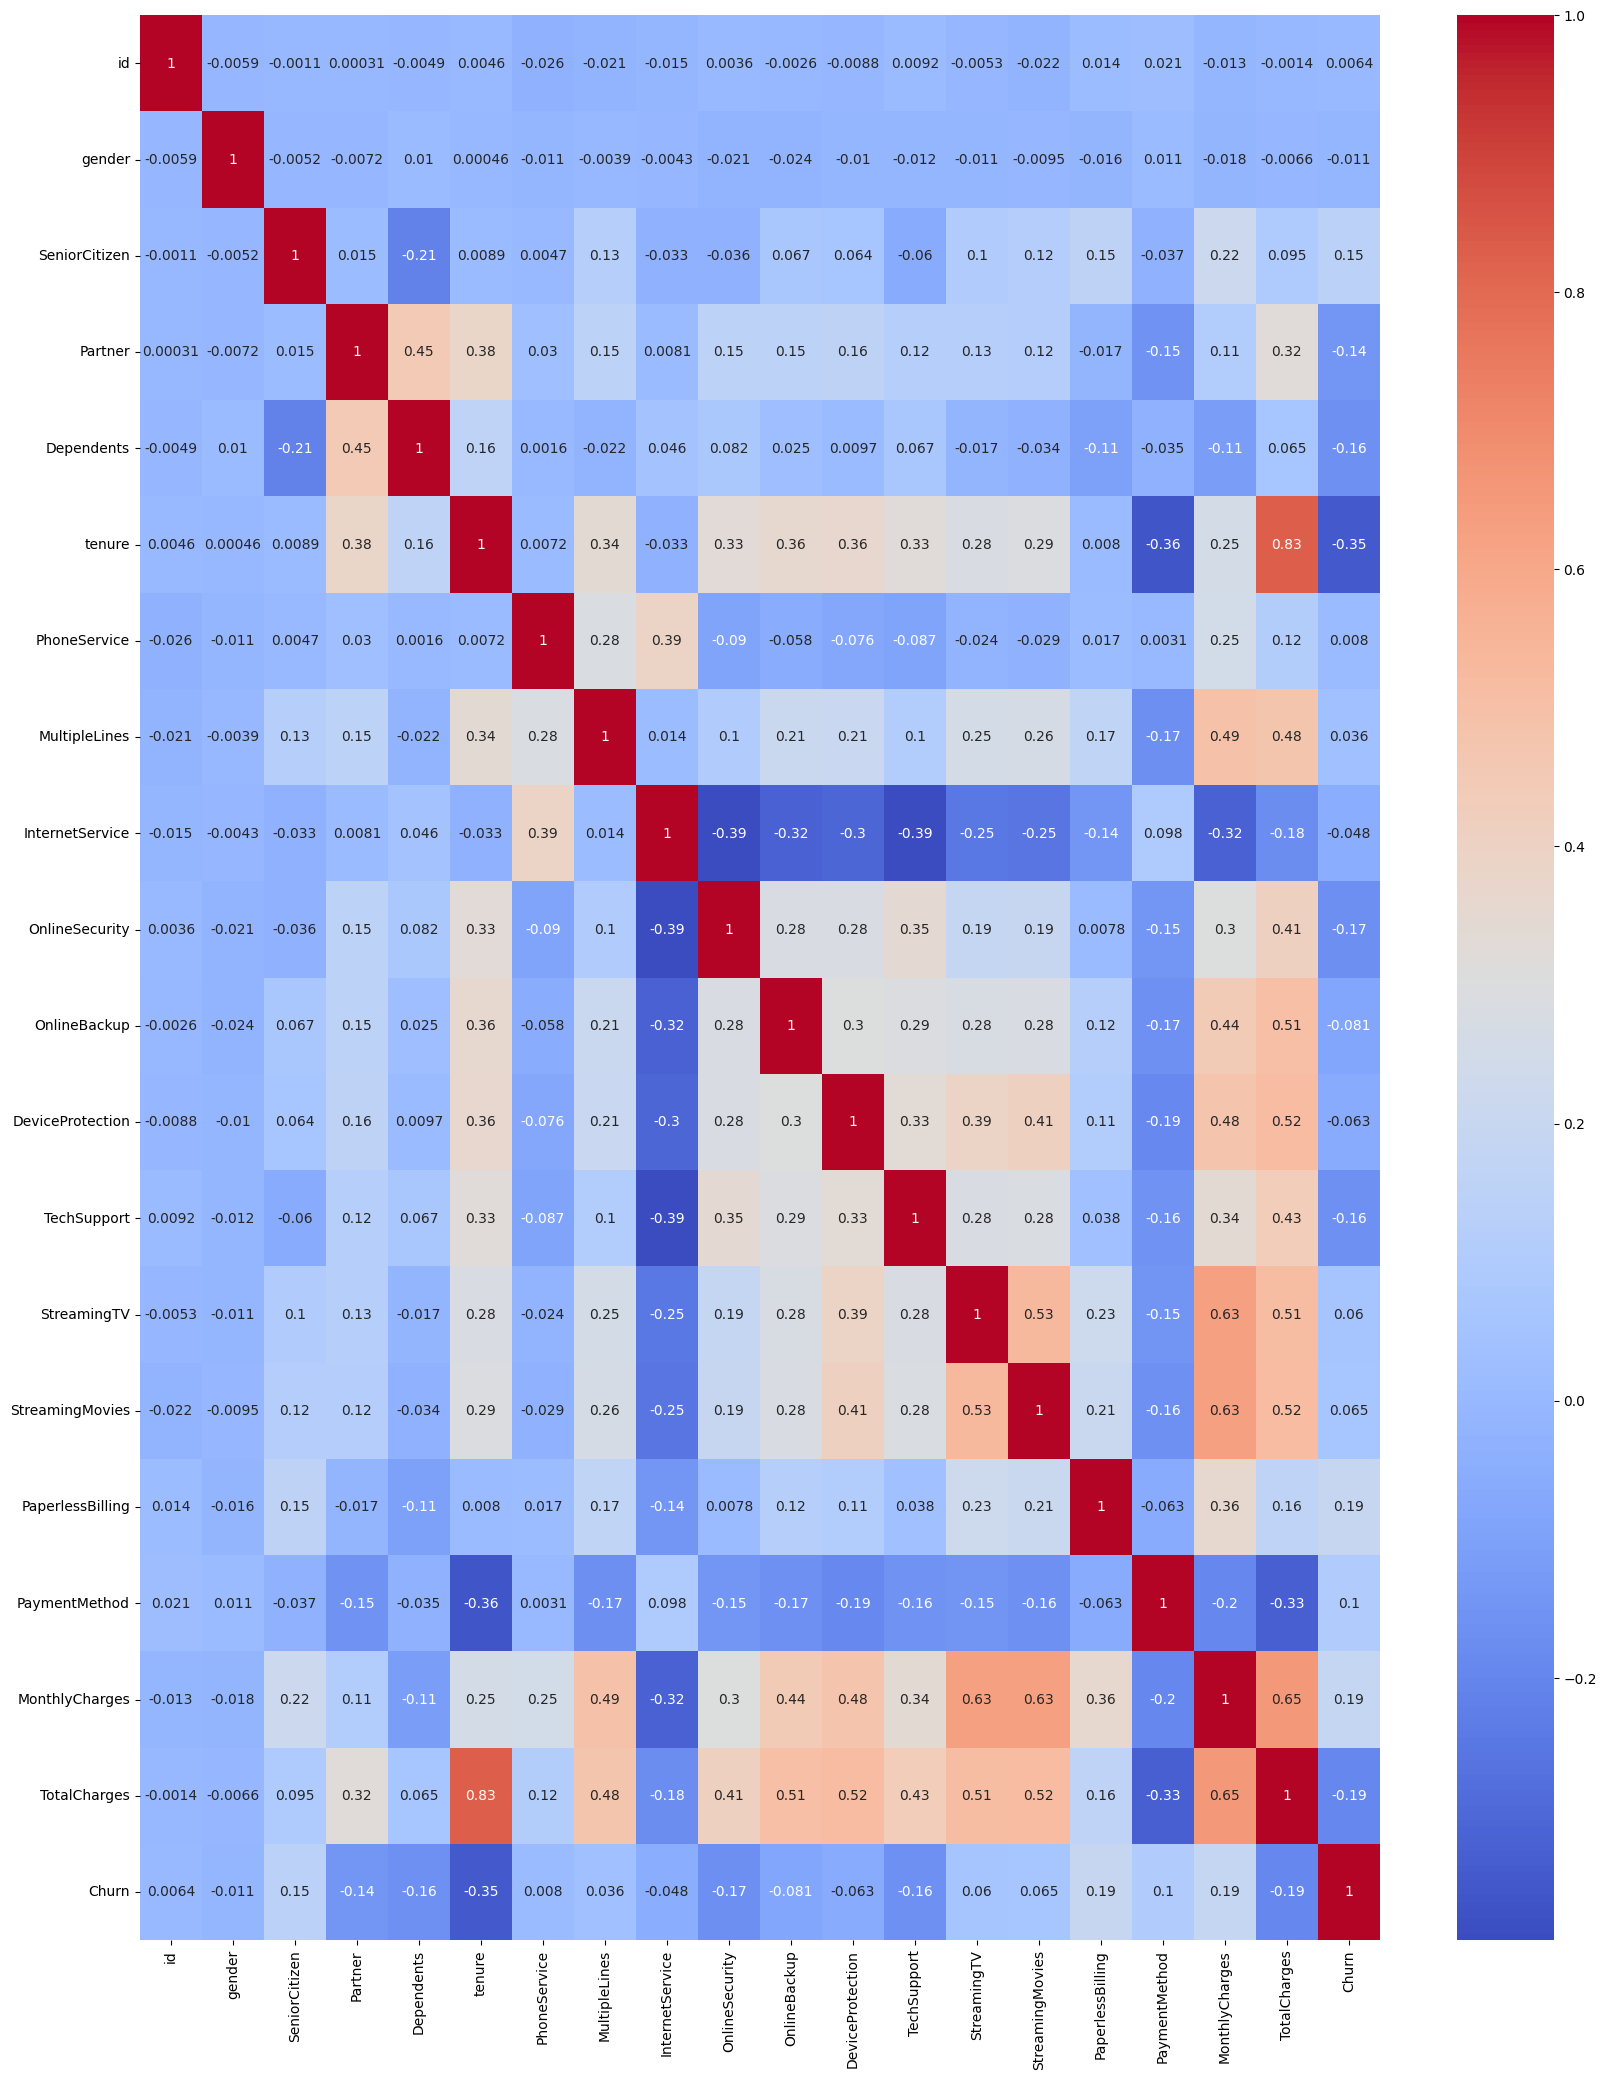

In [57]:
plt.figure(figsize=(20,25))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

In [58]:
X = df.drop('Churn', axis=1)
y = df['Churn']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rf = RandomForestClassifier(
    random_state=42,
    n_jobs=-1,
)

param_grid = {
    "n_estimators": [100, 300],       # fewer options
    "max_depth": [None, 20],          # shallow vs deep
    "min_samples_split": [2, 5],      # typical values
    "min_samples_leaf": [1, 2],       # small set
    "max_features": ["sqrt", "log2"], # drop the float
    "bootstrap": [True],              # keep one option
    "class_weight": ["balanced"]      # assume imbalance
}

grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring="f1_weighted",
    cv=skf,
    n_jobs=-1,
    verbose=1
)

grid.fit(x_train, y_train)

print("Best weighted-F1 (CV):", grid.best_score_)
print("Best params:", grid.best_params_)

best_model = grid.best_estimator_


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best weighted-F1 (CV): 0.7804602246637689
Best params: {'bootstrap': True, 'class_weight': 'balanced', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}


In [60]:
y_pred = best_model.predict(x_test)

def custom_points(y_true, y_pred):
    f1 = f1_score(y_true, y_pred)
    if f1 < 0.50:
        return 0, f1
    points = 100 * (f1 - 0.50) / 0.50
    return points, f1

# Example usage
points, f1 = custom_points(y_test, y_pred)
print(f"F1-score = {f1:.3f}, Points = {points:.1f}")

F1-score = 0.649, Points = 29.9


In [61]:
# test_df = pd.read_csv('content/drive/MyDrive/AI_Challenge_1_test.csv')

# test_df = classifying(filling_missed(test_df))
# final_pred = best_model.predict(test_df)

In [62]:
 # results = pd.DataFrame({
#     "id": test_df["id"],   # or df['id'] if you have an 'id' column
#     "Churn": pd.Series(final_pred).map({1: "Yes", 0: "No"})
# })

# name = 'new.csv'

# results.to_csv(name, index=False)
# print(f"Saved to {name}")